In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt



In [9]:
df = pd.read_csv(r"C:\Users\ayush\Credit_Risk_Analysis\Credit_Risk_EDA\credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Data Description
* person_age: Age of the person
* person_income: Annual Income 
* person_home_ownership: Home ownership
* person_emp_length: Employment length (in years)
* loan_intent: Loan intent (Why is the loan needed)
* loan_grade: Loan Grade (quality score of the loan)
* loan_amnt: Loan amount
* loan_int_rate: Loan interest rate
* loan_status: Loan status (0 is non default and 1 is default)
* loan_percent_income: Percent income
* cb_person_default_on_file: Historical default (Default= failure to pay back the debt)
* cb_person_cred_hist_length: Credit history length

##### Our target variable is loan_status

In [11]:
df.describe(include="all")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [12]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
df.person_emp_length=df.person_emp_length.interpolate()
df.loan_int_rate= df.loan_int_rate.fillna(np.mean(df.loan_int_rate.mean()))

In [14]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
df.loan_status.describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [16]:
df.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

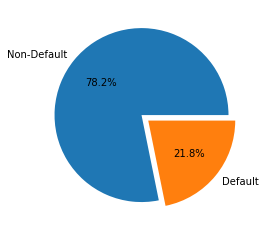

C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

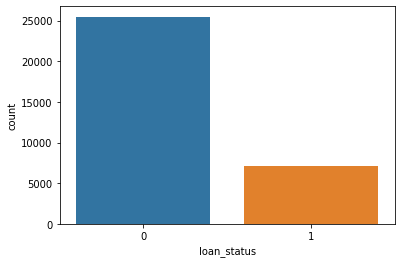

In [17]:
percent_defaults= df.loan_status.value_counts() / len(df) *100

plt.pie(percent_defaults,explode=[0,0.1], labels=['Non-Default','Default'], autopct='%1.1f%%')
plt.show()

sns.countplot(df.loan_status)


<AxesSubplot:xlabel='loan_status', ylabel='loan_percent_income'>

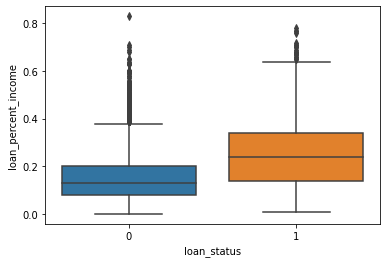

In [18]:
#plt.subplots(figsize=(15,8));
sns.boxplot(x='loan_status', y='loan_percent_income', data = df[["loan_status", "loan_percent_income"]] )
#plt.xticks(fontsize = 14)
#plt.yticks(fontsize = 10);

In [19]:
df_features=df.drop(columns="loan_status")
df_target=df.loan_status

<AxesSubplot:>

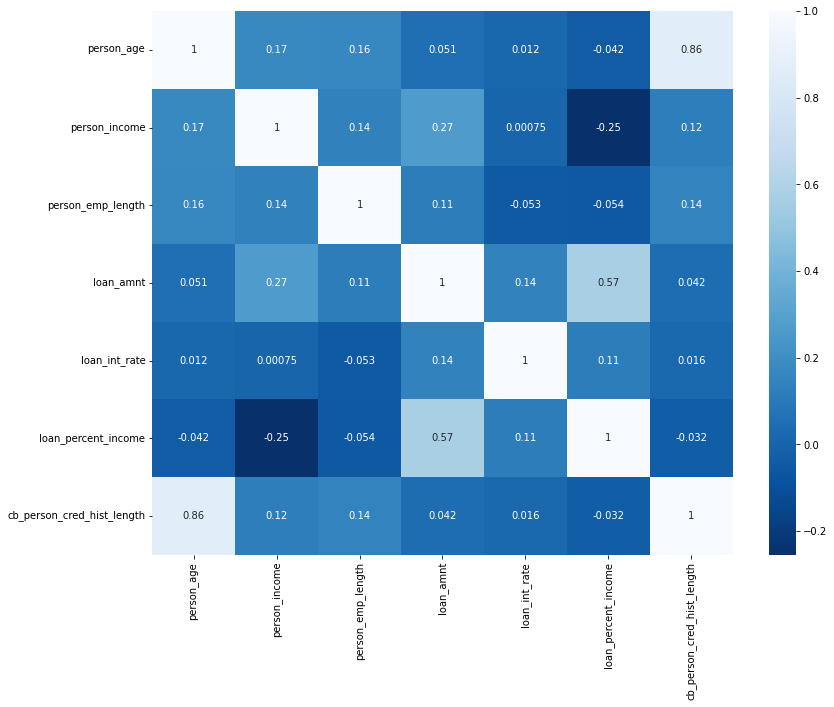

In [20]:
plt.subplots(figsize=(13,10))
sns.heatmap(df_features.corr(), annot=True, cmap='Blues_r')

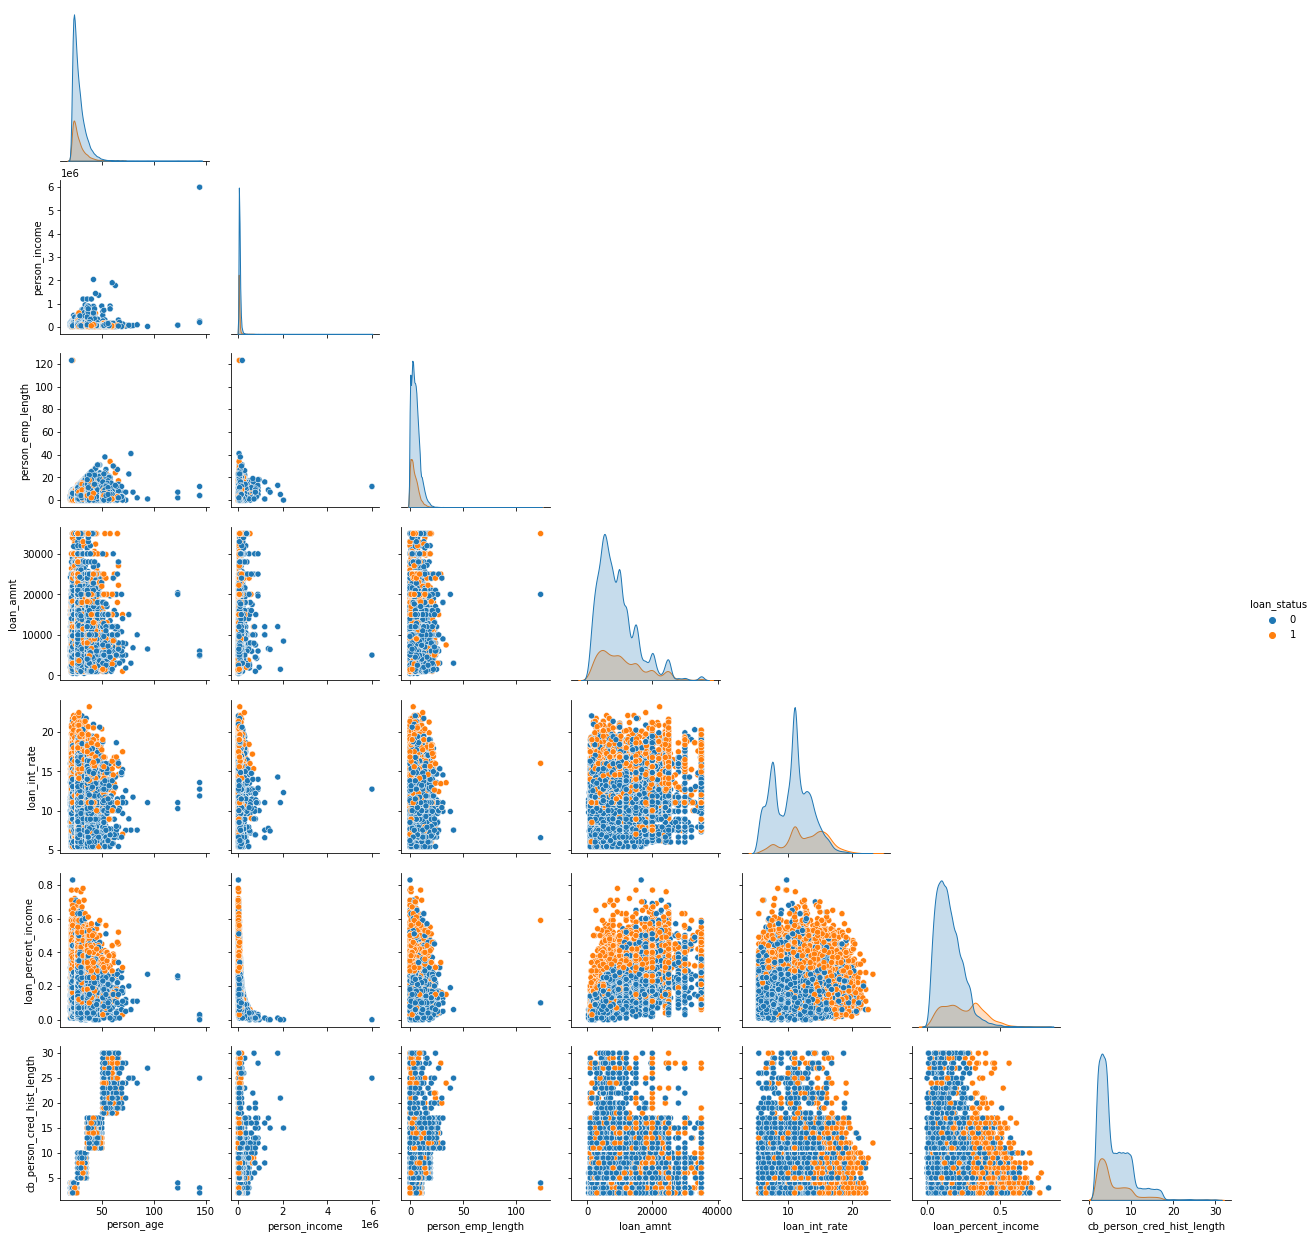

In [21]:
sns.pairplot(df, hue='loan_status', corner= True)

In [22]:
df.describe(include = "O").T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [23]:
defaulters=df[df['loan_status']==1]
non_defaulters=df[df['loan_status']==0]

(array([ 2391.,     0.,     0., 11254.,     0.,     0., 11754.,     0.,
            0.,    74.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

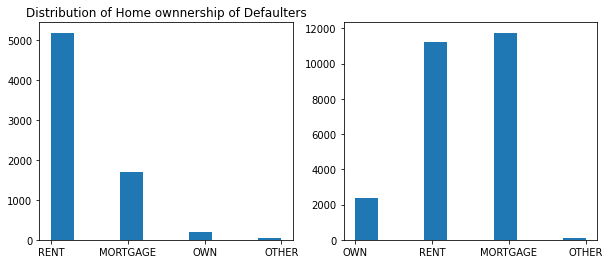

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.hist(defaulters.person_home_ownership)
ax1.set_title("Distribution of Home-ownnership of Defaulters")

ax2.hist(non_defaulters.person_home_ownership)
ax2.set_title("Distribution of Home-ownnership of Non-Defaulters")

In [ ]:
plt.subplots(figsize=(8,8))
plt.bar(df.cb_person_cred_hist_length, df.person_income)